In [23]:
import pandas as pd
data = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
text = data['message']
class_label = data['label']

In [25]:
import numpy as np
from keras.utils.np_utils import to_categorical
classes_list = ["ham","spam"]
label_index = class_label.apply(classes_list.index)
label_1 = np.asarray(label_index)
label = to_categorical(np.asarray(label_1))

In [26]:
label

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [27]:
from keras.preprocessing.text import Tokenizer
tk=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(text)
index=tk.word_index
print(index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, '2': 19, 'that': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'or': 26, 'do': 27, 'can': 28, 'at': 29, "i'm": 30, 'ur': 31, 'get': 32, 'will': 33, 'if': 34, 'be': 35, 'with': 36, 'just': 37, 'no': 38, 'we': 39, 'this': 40, '4': 41, 'gt': 42, 'lt': 43, 'up': 44, 'when': 45, 'ok': 46, 'free': 47, 'from': 48, 'go': 49, 'how': 50, 'all': 51, 'out': 52, 'what': 53, 'know': 54, 'like': 55, 'good': 56, 'then': 57, 'got': 58, 'come': 59, 'was': 60, 'its': 61, 'am': 62, 'time': 63, 'only': 64, 'day': 65, 'love': 66, 'there': 67, 'send': 68, 'he': 69, 'want': 70, 'text': 71, 'as': 72, 'txt': 73, 'one': 74, 'going': 75, 'by': 76, 'ü': 77, "i'll": 78, 'need': 79, 'home': 80, 'about': 81, 'r': 82, 'lor': 83, 'sorry': 84, 'stop': 85, 'still': 86, 'see': 87, 'n': 88, 'back': 89, 'today': 90, 'da': 91, 'our': 92,

In [28]:
x = tk.texts_to_sequences(text)
print (x)

[[49, 471, 4436, 842, 755, 658, 64, 8, 1327, 88, 123, 351, 1328, 148, 2997, 1329, 67, 58, 4437, 144], [46, 336, 1499, 472, 6, 1940], [47, 489, 8, 19, 4, 797, 901, 2, 176, 1941, 1105, 659, 1942, 2331, 261, 2332, 71, 1941, 2, 1943, 2, 337, 489, 555, 960, 73, 391, 174, 660, 392, 2998], [6, 248, 150, 23, 382, 2999, 6, 139, 154, 57, 150], [1024, 1, 98, 108, 69, 490, 2, 961, 69, 1944, 221, 112, 473], [798, 129, 67, 1690, 145, 109, 158, 1945, 21, 7, 38, 338, 89, 902, 55, 116, 414, 3, 44, 12, 14, 86, 1946, 46, 365, 960, 4438, 2, 68, 323, 232, 2, 3000], [210, 11, 633, 9, 25, 55, 2, 383, 36, 10, 110, 718, 10, 55, 4439, 4440], [72, 235, 13, 1204, 2333, 2334, 1947, 2335, 2336, 2337, 799, 118, 109, 609, 72, 13, 1025, 12, 51, 1691, 843, 393, 2, 1106, 13, 249, 1025], [719, 72, 4, 844, 441, 236, 3, 17, 109, 442, 2, 3001, 1330, 151, 962, 2, 127, 16, 3002, 127, 415, 3003, 516, 963, 581, 64], [136, 13, 97, 686, 1026, 26, 133, 6, 82, 1205, 2, 491, 2, 5, 324, 535, 903, 36, 339, 12, 47, 16, 5, 97, 491, 243,

In [29]:
vocab_size = len(index)
print(vocab_size+1)

9010


In [30]:
index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'ur': 31,
 'get': 32,
 'will': 33,
 'if': 34,
 'be': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 '4': 41,
 'gt': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'go': 49,
 'how': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'come': 59,
 'was': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'ü': 77,
 "i'll": 78,
 'need': 79,
 'home': 80,
 'about': 81,
 'r': 82,
 'lor': 83,
 'sorry': 84,
 'stop'

In [31]:
from keras.preprocessing.sequence import pad_sequences
embedding_vector_len =32
padded_docs = pad_sequences(x, maxlen=embedding_vector_len, padding='post')
print (padded_docs)

[[  49  471 4436 ...    0    0    0]
 [  46  336 1499 ...    0    0    0]
 [  47  489    8 ...  392 2998    0]
 ...
 [9007   60    8 ...    0    0    0]
 [   5  534  114 ...    0    0    0]
 [2687   61  465 ...    0    0    0]]


In [32]:
padded_docs[0]

array([  49,  471, 4436,  842,  755,  658,   64,    8, 1327,   88,  123,
        351, 1328,  148, 2997, 1329,   67,   58, 4437,  144,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, label, test_size=0.30, random_state=42)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from keras.models import Sequential, Model

Bilstm_input= Input(shape=(embedding_vector_len,),  dtype='int32', name='lstm_input')
x= Embedding(vocab_size+1, 100, input_length=embedding_vector_len,trainable=True)(Bilstm_input)
x_1=Bidirectional(LSTM(256,return_sequences=True))(x)
x_2= Bidirectional(LSTM(128,return_sequences=True))(x_1)
Bilstm_out= Bidirectional(LSTM(64,return_sequences=False))(x_2)
main_output = Dense(2,activation='softmax', name='main_output')(Bilstm_out)
model = Model(inputs=Bilstm_input, outputs=main_output)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 32)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 32, 100)           901000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32, 512)           731136    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32, 256)           656384    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               164352    
_________________________________________________________________
main_output (Dense)          (None, 2)                 258       
Total params: 2,453,130
Trainable params: 2,453,130
Non-trainable params: 0
_________________________________________________

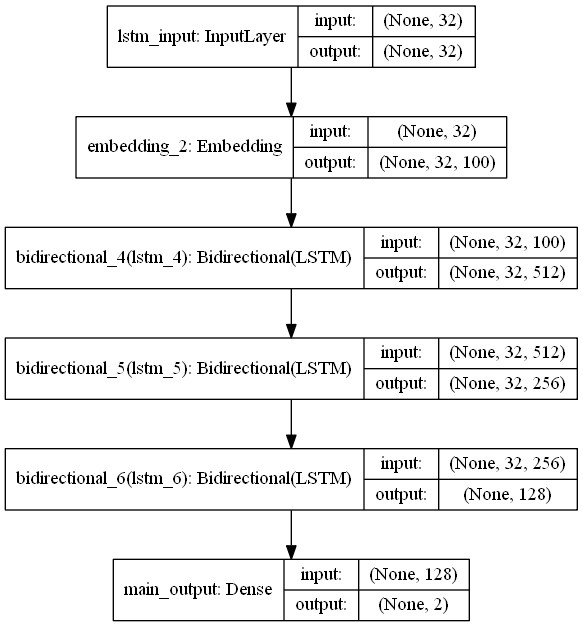

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),
              epochs=5,batch_size=100, verbose=2)

C:\Users\deVam\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3900 samples, validate on 1672 samples
Epoch 1/5
 - 16s - loss: 0.2087 - accuracy: 0.9318 - val_loss: 0.0624 - val_accuracy: 0.9827
Epoch 2/5
 - 12s - loss: 0.0388 - accuracy: 0.9910 - val_loss: 0.0349 - val_accuracy: 0.9904
Epoch 3/5
 - 12s - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0333 - val_accuracy: 0.9910
Epoch 4/5
 - 13s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0491 - val_accuracy: 0.9910
Epoch 5/5
 - 13s - loss: 2.4256e-04 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9910


In [37]:
predictions_test = model.predict(X_test)
predictions_test_1 = np.zeros_like(predictions_test)
predictions_test_1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1

In [38]:
predictions_test

array([[9.9995410e-01, 4.5948669e-05],
       [9.9995804e-01, 4.1952168e-05],
       [9.9995887e-01, 4.1066334e-05],
       ...,
       [9.9996066e-01, 3.9301409e-05],
       [1.1895596e-04, 9.9988103e-01],
       [9.9995744e-01, 4.2512205e-05]], dtype=float32)

In [39]:
predictions_test_1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test_1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.96      0.97       224

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672
 samples avg       0.99      0.99      0.99      1672



In [41]:
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test, predictions_test_1))


0.9910287081339713
